[View in Colaboratory](https://colab.research.google.com/github/aminzabardast/Tensorflow-Tutorials/blob/dev/1.SimpleRegression.ipynb)

# Simple Iterative Regression

## Including Necessary Libraries

In [64]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Synthesising Data

Creating data points that lie on a line with an intercept of $23$ and a slope of $1.4$.

In [65]:
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*1.4+23  # True value of Y

Visualizing the data:

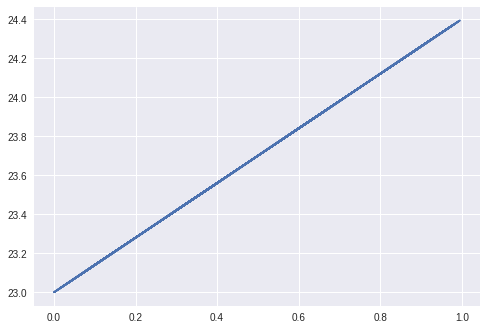

In [66]:
plt.plot(x_data, y_data)

## Creating Tensorflow Variables

Initializing Weights with random values between $(-1, 1)$, and biases with $0$ value.

In [67]:
Weights = tf.Variable(initial_value=tf.random_uniform([1], -1, 1))
biases = tf.Variable(initial_value=tf.zeros([1]))

## Calculating Predicted value of $y$

In [68]:
y_pred = Weights * x_data + biases

Predicted $y$ would be a *Tensor*.

In [69]:
type(y_pred)

tensorflow.python.framework.ops.Tensor

## Simple Loss Function

The loss function would be a simple Mean Squared Error:
$$
L = \dfrac{1}{N}\sum_{i}{(y'-y)^2}
$$
where `y_data` is $y$ and `y_pred` is $y'$.

In [70]:
loss = tf.reduce_mean(tf.square(y_pred-y_data))

## Optimizing the initial values

For this code, a *Gradient Descent* optimizer would be enough.

In [71]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

## Creating Training Step

In [72]:
train = optimizer.minimize(loss=loss)

## Initilizing Variables and Creating Session

After creating the tensor structure, Everything should be initilized.

In [73]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(fetches=init)

## Iterating the result.

In [74]:
for i in range(201):
    sess.run(fetches=train)
    if i % 20 == 0:
        print(i, sess.run(Weights), sess.run(biases))

0 [11.752113] [23.370518]
20 [2.845679] [22.254917]
40 [1.6603194] [22.865835]
60 [1.4468753] [22.975842]
80 [1.4084407] [22.99565]
100 [1.4015208] [22.999216]
120 [1.4002743] [22.999859]
140 [1.4000486] [22.999975]
160 [1.400009] [22.999996]
180 [1.4000026] [22.999998]
200 [1.4000026] [22.999998]


The result indicates that The Slope (Weights) and Intercept (biases) have been converged to the correct values.

**Weights:** $1.4000026 \approx 1.4$

**Biases:** $22.999998 \approx 23$
